In [146]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from pandas.plotting import scatter_matrix

path = 'D:/OneDrive/Online/SelfLearn/Ryerson/MSc/2018W/DS8004/Projects/P1'
train = pd.read_csv(path+'/training.csv')

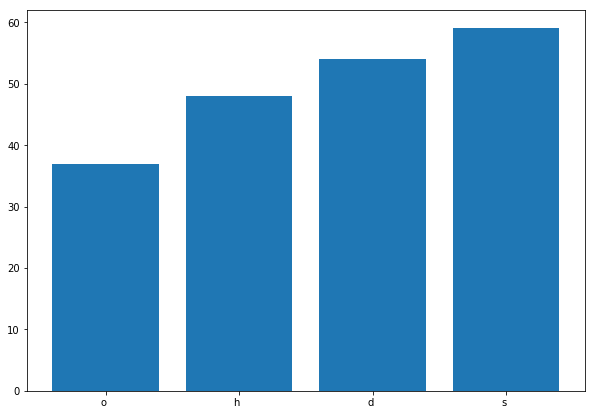

In [148]:
summary = train.groupby('class').count().b1.sort_values()

plt.figure(figsize=(10,7))
plt.bar(x = range(4), height= summary, label=summary.index )
plt.xticks(range(4), summary.index)
plt.savefig('classHist.png')
plt.show();

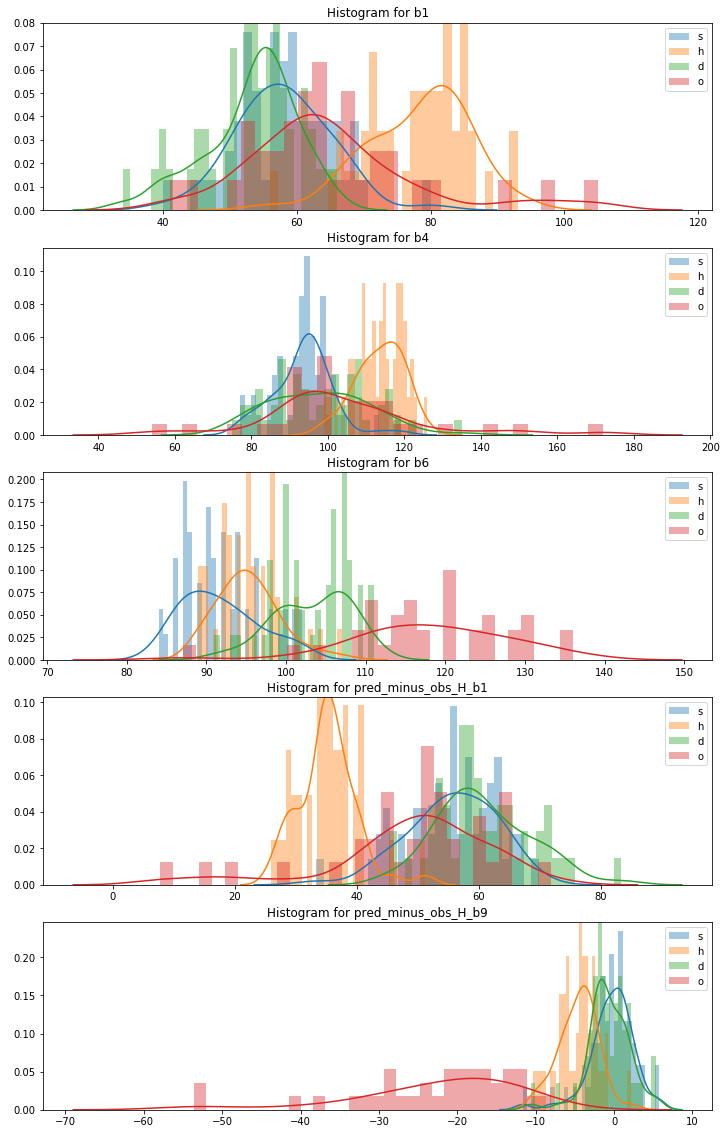

In [89]:
binCount = 30
features = train.loc[:,['b1', 'b4', 'b6', 'pred_minus_obs_H_b1', 'pred_minus_obs_H_b9']].columns

plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, cn in enumerate(train[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train[cn][train['class'] == 's '], bins=binCount, label='s')
    sns.distplot(train[cn][train['class'] == 'h '], bins=binCount, label='h')
    sns.distplot(train[cn][train['class'] == 'd '], bins=binCount, label='d')
    sns.distplot(train[cn][train['class'] == 'o '], bins=binCount, label='o')
    ax.set_xlabel('')
    ax.legend()
    ax.set_title('Histogram for ' + str(cn))
plt.savefig('featureHist.png')
plt.show()

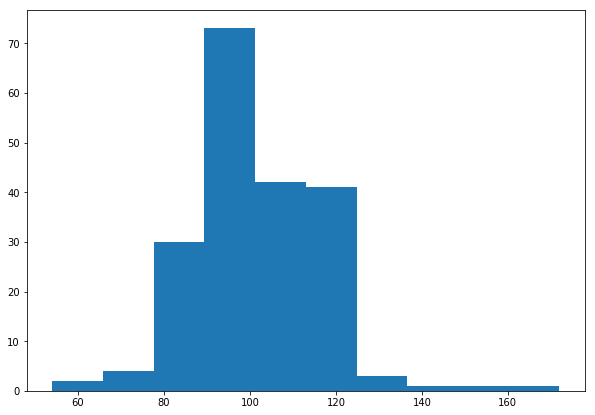

In [90]:
plt.figure(figsize=(10,7))
plt.hist(train.b4)
#plt.xticks(range(4), np.unique(train['class'].values))
#plt.savefig('classHist.png')
plt.show();

In [96]:
summary = train[features].describe()
summary = summary.round(2)
print(summary.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &      b1 &      b4 &      b6 &  pred\_minus\_obs\_H\_b1 &  pred\_minus\_obs\_H\_b9 \\
\midrule
count &  198.00 &  198.00 &  198.00 &               198.00 &               198.00 \\
mean  &   62.95 &  101.41 &  100.65 &                50.82 &                -5.59 \\
std   &   12.78 &   14.80 &   11.19 &                12.84 &                 9.77 \\
min   &   34.00 &   54.00 &   84.00 &                 7.66 &               -53.53 \\
25\%   &   54.00 &   92.25 &   92.00 &                40.67 &                -6.63 \\
50\%   &   60.00 &   99.50 &   98.00 &                53.03 &                -2.26 \\
75\%   &   70.75 &  111.75 &  107.00 &                59.92 &                 0.25 \\
max   &  105.00 &  172.00 &  136.00 &                83.32 &                 5.74 \\
\bottomrule
\end{tabular}



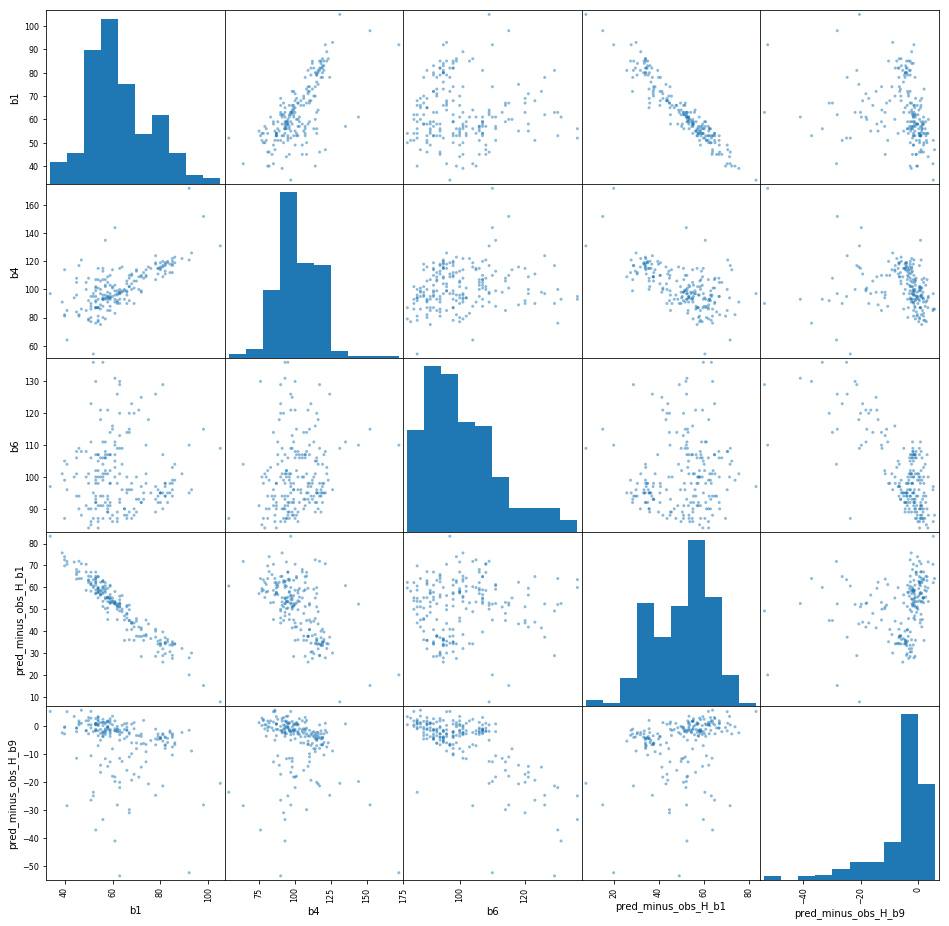

In [92]:
scatter_matrix( train.loc[:,['b1', 'b4', 'b6', 'pred_minus_obs_H_b1', 'pred_minus_obs_H_b9']], figsize=(16, 16))
plt.savefig('scatterMat.png')
plt.show()

In [101]:
print(train[features].corr().round(2).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &    b1 &    b4 &    b6 &  pred\_minus\_obs\_H\_b1 &  pred\_minus\_obs\_H\_b9 \\
\midrule
b1                  &  1.00 &  0.68 &  0.01 &                -0.96 &                -0.25 \\
b4                  &  0.68 &  1.00 &  0.17 &                -0.62 &                -0.21 \\
b6                  &  0.01 &  0.17 &  1.00 &                 0.06 &                -0.72 \\
pred\_minus\_obs\_H\_b1 & -0.96 & -0.62 &  0.06 &                 1.00 &                 0.24 \\
pred\_minus\_obs\_H\_b9 & -0.25 & -0.21 & -0.72 &                 0.24 &                 1.00 \\
\bottomrule
\end{tabular}



In [196]:
import random 
path = 'D:/OneDrive/Online/SelfLearn/Ryerson/MSc/2018W/DS8004/Projects/P1'
train = pd.read_csv(path+'/Data_Cortex_Nuclear.csv')

train['MouseID2'] = [x.partition("_")[0] for x in train.MouseID] 

random.seed(24)
features = random.sample(range(1,78),5)
train.iloc[:,features].columns

Index(['ADARB1_N', 'EGR1_N', 'ELK_N', 'MEK_N', 'CAMKII_N'], dtype='object')

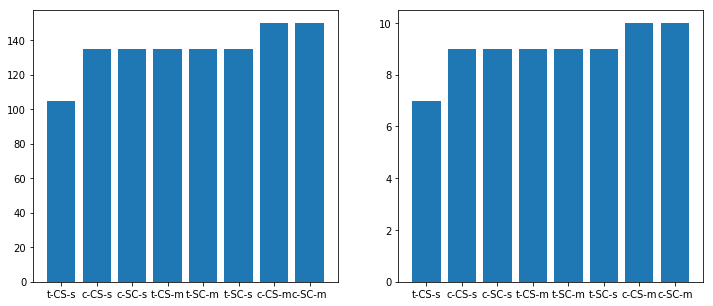

In [197]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

summary = train.groupby('class').count().ADARB1_N.sort_values()
ax1.bar(x = range(8), height= summary)
ax1.set_xticks(range(8))
ax1.set_xticklabels(labels=summary.index)
#ax1.set_title('Sharing Y axis')

summary = train.loc[:,['class','MouseID2']].drop_duplicates().groupby('class').MouseID2.count().sort_values()
ax2.bar(x = range(8), height= summary)
ax2.set_xticks(range(8))
ax2.set_xticklabels(labels=summary.index)
plt.savefig('classHistMice.png')
plt.show();

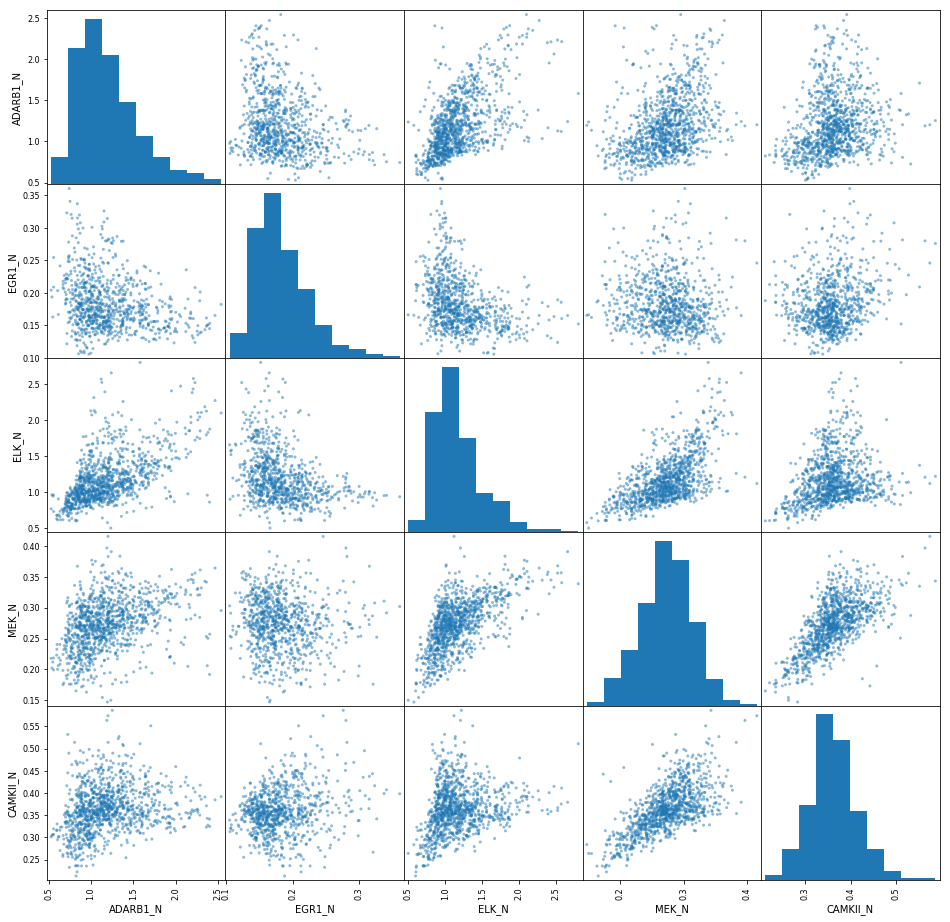

In [198]:
scatter_matrix( train.iloc[:,features], figsize=(16, 16))
#plt.savefig('scatterMatMice.png')
plt.show()


In [199]:
print(train.loc[:,['ADARB1_N', 'EGR1_N', 'ELK_N', 'MEK_N', 'CAMKII_N']].corr().round(2).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  ADARB1\_N &  EGR1\_N &  ELK\_N &  MEK\_N &  CAMKII\_N \\
\midrule
ADARB1\_N &      1.00 &   -0.26 &   0.57 &   0.38 &      0.22 \\
EGR1\_N   &     -0.26 &    1.00 &  -0.35 &  -0.07 &      0.21 \\
ELK\_N    &      0.57 &   -0.35 &   1.00 &   0.62 &      0.23 \\
MEK\_N    &      0.38 &   -0.07 &   0.62 &   1.00 &      0.67 \\
CAMKII\_N &      0.22 &    0.21 &   0.23 &   0.67 &      1.00 \\
\bottomrule
\end{tabular}



In [201]:
summary = train.iloc[:,features].describe()
summary = summary.round(2)
print(summary.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  ADARB1\_N &  EGR1\_N &    ELK\_N &    MEK\_N &  CAMKII\_N \\
\midrule
count &   1080.00 &  870.00 &  1062.00 &  1073.00 &   1077.00 \\
mean  &      1.20 &    0.18 &     1.17 &     0.27 &      0.36 \\
std   &      0.36 &    0.04 &     0.34 &     0.04 &      0.05 \\
min   &      0.53 &    0.11 &     0.50 &     0.15 &      0.21 \\
25\%   &      0.93 &    0.16 &     0.94 &     0.25 &      0.33 \\
50\%   &      1.13 &    0.17 &     1.10 &     0.27 &      0.36 \\
75\%   &      1.38 &    0.20 &     1.32 &     0.30 &      0.39 \\
max   &      2.54 &    0.36 &     2.80 &     0.42 &      0.59 \\
\bottomrule
\end{tabular}

